# 캐글 타이타닉 데이터셋 분석

EDA (탐색적 데이터 분석)를 할 때 데이터를 시각화하는 과정은 데이터를 이해하고, 패턴을 찾고, 가설을 세우는 데 매우 중요합니다. 일반적으로 EDA를 진행하면서 데이터를 시각화할 때 사용하는 대표적인 플롯과 그리는 순서를 아래에 정리해보았습니다.

### EDA에서 플롯 그리는 대표적인 순서

1. **데이터의 기본 통계 및 구조 확인**
   - **`df.head()`**, **`df.info()`**, **`df.describe()`**: 데이터의 기본적인 구조와 통계 요약을 확인합니다.
   - **히스토그램**: 각 변수의 분포를 확인하기 위해 사용합니다.
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt

     sns.histplot(df['column_name'])
     plt.show()
     ```

2. **범주형 변수의 분포 확인**
   - **막대 그래프 (Bar Plot)**: 각 범주형 변수의 빈도를 시각화합니다.
     ```python
     sns.countplot(x='categorical_column', data=df)
     plt.show()
     ```
   - **파이 차트**: 범주형 변수의 비율을 시각화할 때 유용합니다.
     ```python
     df['categorical_column'].value_counts().plot.pie(autopct='%1.1f%%')
     plt.show()
     ```
   - **cat 플롯 (cat Plot)**: 범주형 변수들을 x,y와 hue로 묶어서 교차관계를 확인하기에 좋더라

    '''python
    sns.catplot(x = '범주형' ,  y = '범주형'. hue = '범주형 ')
    '''

3. **연속형 변수의 분포 확인**
   - **히스토그램**: 연속형 변수의 분포를 시각화합니다.
     ```python
     sns.histplot(df['continuous_column'])
     plt.show()
     ```
   - **상자 그림 (Box Plot)**: 데이터의 중앙값, 사분위수, 이상치를 시각화합니다.
     ```python
     sns.boxplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```

4. **변수 간의 관계 시각화**
   - **산점도 (Scatter Plot)**: 두 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.scatterplot(x='continuous_column1', y='continuous_column2', data=df)
     plt.show()
     ```
   - **페어 플롯 (Pair Plot)**: 연속형 변수 간의 쌍별 관계를 시각화합니다.
     ```python
     sns.pairplot(df[['col1', 'col2', 'col3']])
     plt.show()
     ```

5. **범주형 변수와 연속형 변수의 관계 시각화**
   - **상자 그림 (Box Plot)**: 범주형 변수와 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.boxplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```
   - **바이올린 플롯 (Violin Plot)**: 상자 그림과 밀도 곡선을 결합하여 범주형 변수와 연속형 변수 간의 관계를 시각화합니다.
     ```python
     sns.violinplot(x='categorical_column', y='continuous_column', data=df)
     plt.show()
     ```

6. **상관 관계 분석**
   - **상관 행렬 히트맵 (Heatmap)**: 연속형 변수 간의 상관 관계를 시각화합니다.
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt

     corr = df.corr()
     sns.heatmap(corr, annot=True, cmap='coolwarm')
     plt.show()
     ```

7. **추가적인 시각화**
   - **리니어 리그레션 플롯 (Regression Plot)**: 두 연속형 변수 간의 관계와 추세선을 시각화합니다.
     ```python
     sns.regplot(x='continuous_column1', y='continuous_column2', data=df)
     plt.show()
     ```
   - **선 그래프 (Line Plot)**: 시간에 따른 변화 추세를 시각화할 때 유용합니다.
     ```python
     sns.lineplot(x='time_column', y='value_column', data=df)
     plt.show()
     ```

### EDA 시 주의할 점

1. **데이터 전처리**: EDA를 진행하기 전에 결측값, 이상치 등을 처리해야 합니다.
2. **변수의 타입**: 연속형과 범주형 변수의 구분에 따라 적절한 플롯을 선택해야 합니다.
3. **시각화의 목적**: 데이터를 이해하고 인사이트를 얻기 위한 목적에 따라 적절한 플롯을 선택해야 합니다.

이러한 순서와 방법을 통해 데이터를 시각적으로 탐색하고 이해할 수 있으며, 데이터 분석의 기초를 다질 수 있습니다.

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [163]:
df = pd.read_csv('./dataset/train.csv')
# df는 train dataset
df_test = pd.read_csv('./dataset/test.csv')

In [164]:
print(df.shape)
print(df_test.shape)

(891, 12)
(418, 11)


+ PassengerId      : 승객 아이디
+ Survived         : 사망 0, 생존 1
+ Pclass           : 1,2,3 등석
+ Name             : 이름
+ Sex              : 성별 남자 0, 여자 1
+ Age              : 나이
+ SibSp            : 동승한 자매/배우자의 수
+ Parch            : 동승한 부모 자식의 수
+ Ticket           : 티켓 번호
+ Fare             : 요금
+ Cabin            : 방 호수
+ Embarked         : 탑승지 c = 셰르부르, q= 퀸즈타운, s= 사우샘프턴

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [167]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

+ 각 변수의 결측치 비율

In [168]:
for c in df.columns:
    print(f'{c:<14} : {df[c].isnull().sum() / len(df[c]): .10f} %')

PassengerId    :  0.0000000000 %
Survived       :  0.0000000000 %
Pclass         :  0.0000000000 %
Name           :  0.0000000000 %
Sex            :  0.0000000000 %
Age            :  0.1986531987 %
SibSp          :  0.0000000000 %
Parch          :  0.0000000000 %
Ticket         :  0.0000000000 %
Fare           :  0.0000000000 %
Cabin          :  0.7710437710 %
Embarked       :  0.0022446689 %


+ 생존자 비율 : 38%
+ 평균 나이   : 29.7세
+ 성별        : 여성 35%, 남성 65%

In [171]:
df.describe() # include='all'시 연속형,범주형 모두 포함

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: >

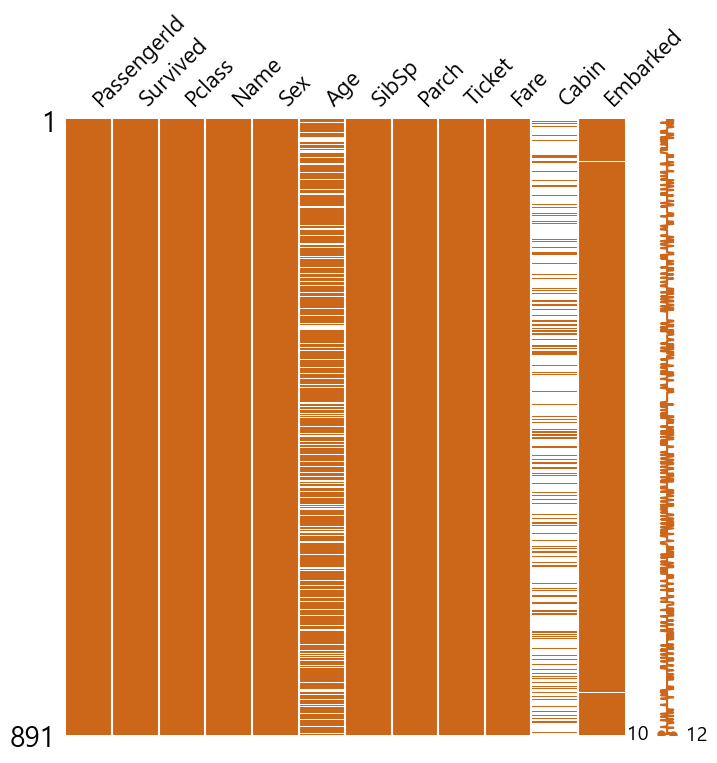

In [173]:
msno.matrix(df, figsize = (8,8), color= (0.8,0.4,0.1))

# 생존자 비율

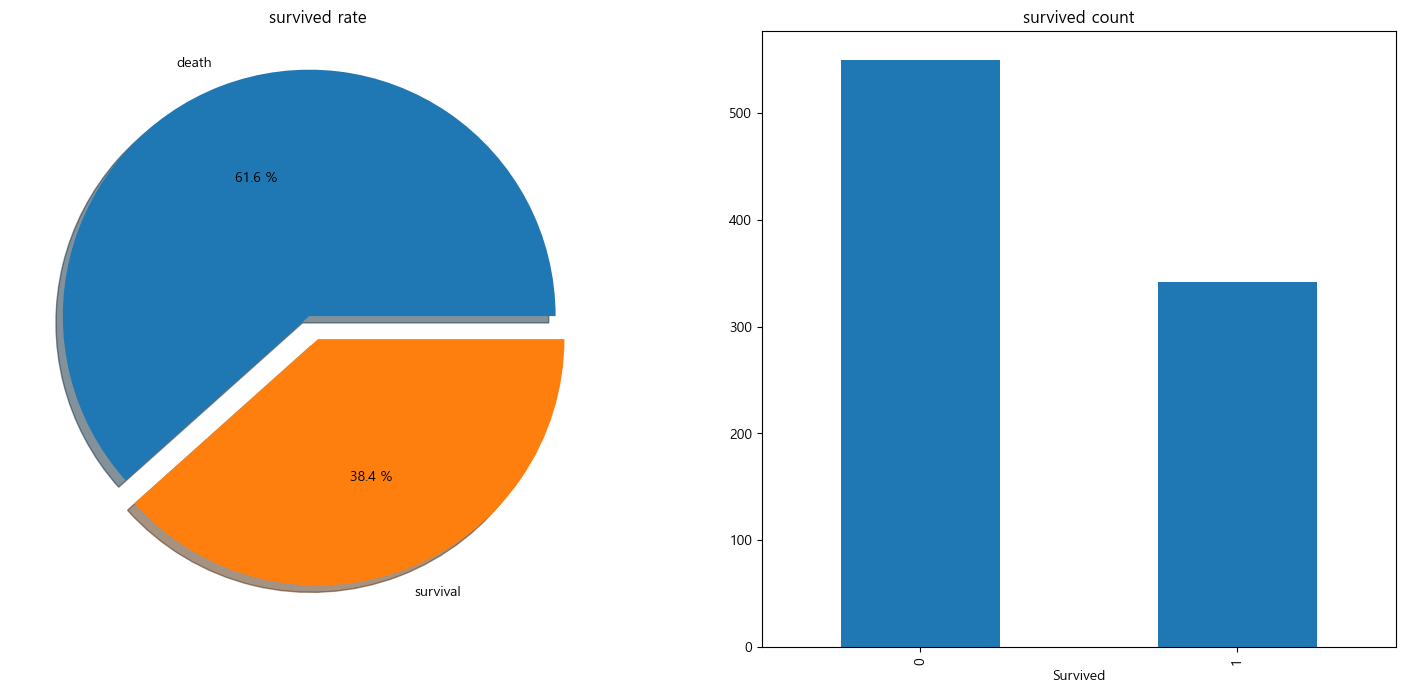

In [174]:
f, axes = plt.subplots(1,2,figsize = (18,8))
axes[0].pie(df['Survived'].value_counts(),labels = ['death', 'survival'],shadow = True,explode = [0.1,0] ,autopct='%.1f %%');
axes[0].set_title('survived rate')

axes[1].set_title('survived count')
df['Survived'].value_counts().plot.bar(ax =axes[1]);

# Pclass -  좋은 자리일 수록 생존률 증가

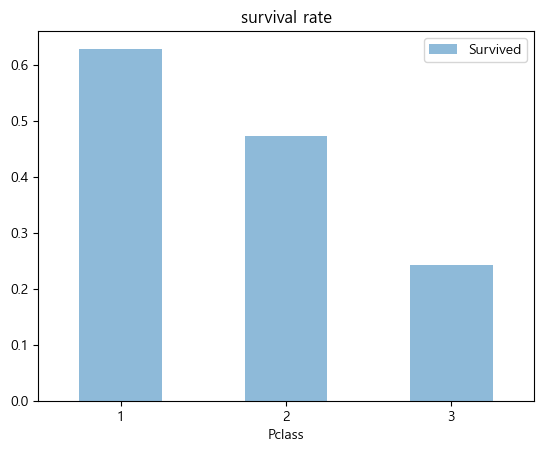

In [175]:
m = df[['Survived',"Pclass"]].groupby(['Pclass']).mean()
m.plot.bar(alpha = 0.5)
plt.xticks(rotation=0);
plt.title('survival rate');

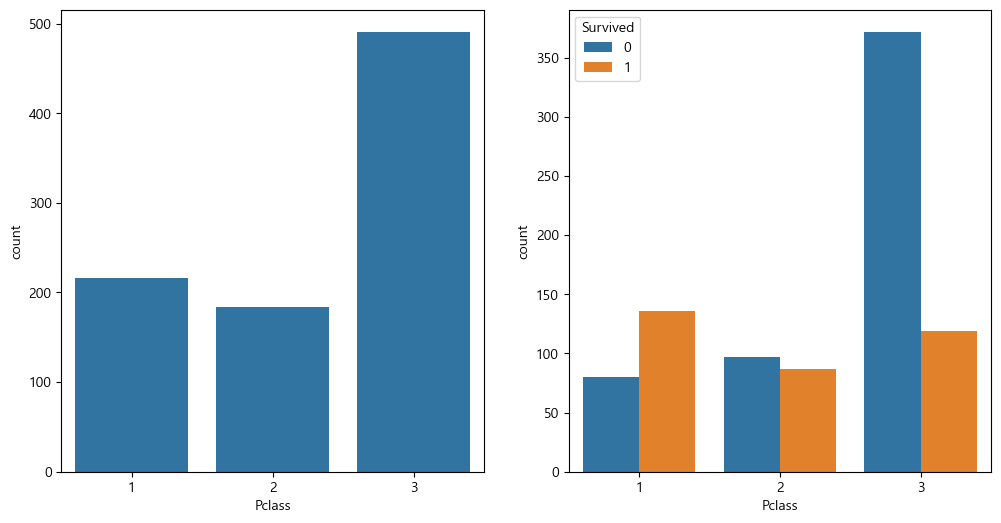

In [176]:
f,a = plt.subplots(1,2,figsize = (12,6))
sns.countplot(df,x= 'Pclass', ax = a[0])
sns.countplot(x='Pclass',hue = 'Survived', data = df,ax = a[1]);

<Axes: xlabel='Pclass'>

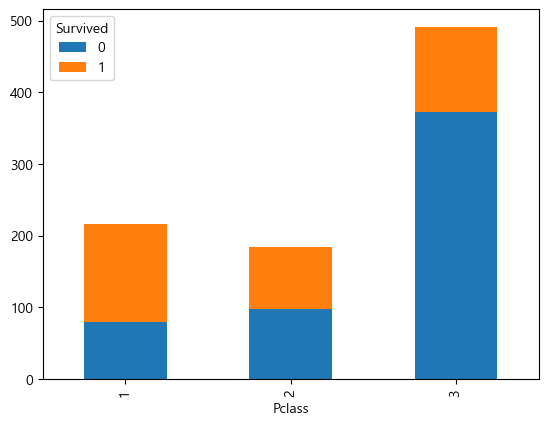

In [177]:
pd.crosstab(df['Pclass'],df['Survived']).plot.bar(stacked = True)

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지

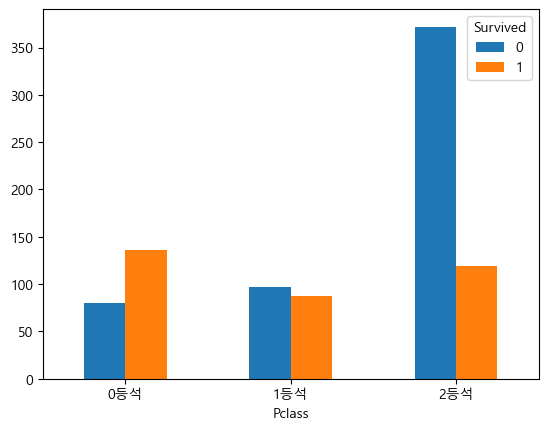

In [180]:
a = df.groupby(['Pclass','Survived']).size().unstack().plot.bar()

plt.xticks(a.get_xticks(),map(lambda x : str(x) + '등석',a.get_xticks()), rotation = 0);

In [191]:
df[['Fare','Pclass']].groupby(by = 'Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


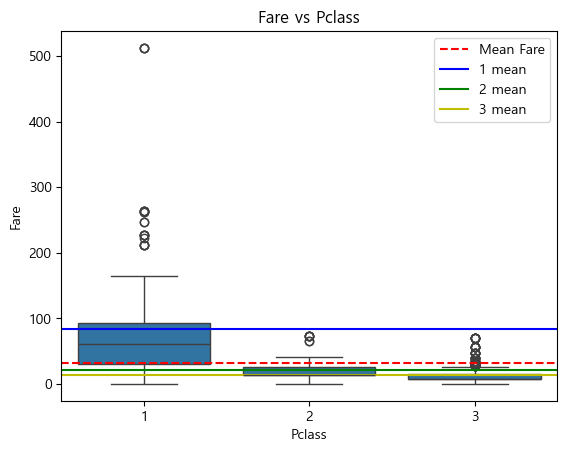

In [195]:
sns.boxplot(data = df, y = 'Fare',x = 'Pclass')
plt.axhline(df['Fare'].mean(), color='red', linestyle='--', label='Mean Fare')  # 가로선 추가
plt.axhline(84.1, color='b', label='1 mean')  # 가로선 추가
plt.axhline(20.6, color='g', label='2 mean')  # 가로선 추가
plt.axhline(13.6, color='y', label='3 mean')  # 가로선 추가
plt.legend()
plt.title('Fare vs Pclass');

# 성별 - 여성보다 남성이 많고 그 중 남성 사망자가 더 많음

C:\Users\yunji\AppData\Local\Temp\ipykernel_1092\2279404100.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['남자0','여자1'],rotation = 0);


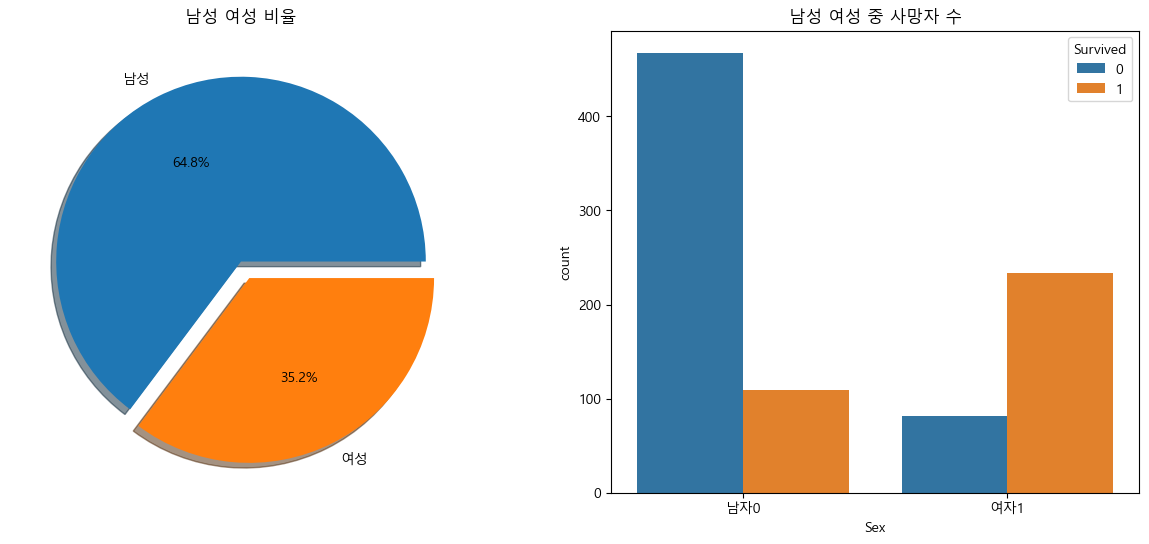

In [196]:
f,ax = plt.subplots(1,2,figsize = (15,6));
df['Sex'].value_counts().plot.pie(autopct = '%.1f%%',ax = ax[0],labels = ['남성','여성'],explode = [0,0.1],shadow = True);
ax[0].set_title('남성 여성 비율');
ax[0].set_ylabel('');
sns.countplot(df,x= 'Sex',hue = 'Survived',ax = ax[1]);
ax[1].set_xticklabels(['남자0','여자1'],rotation = 0);
ax[1].set_title('남성 여성 중 사망자 수');


c:\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  self._figure.tight_layout(*args, **kwargs)


c:\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


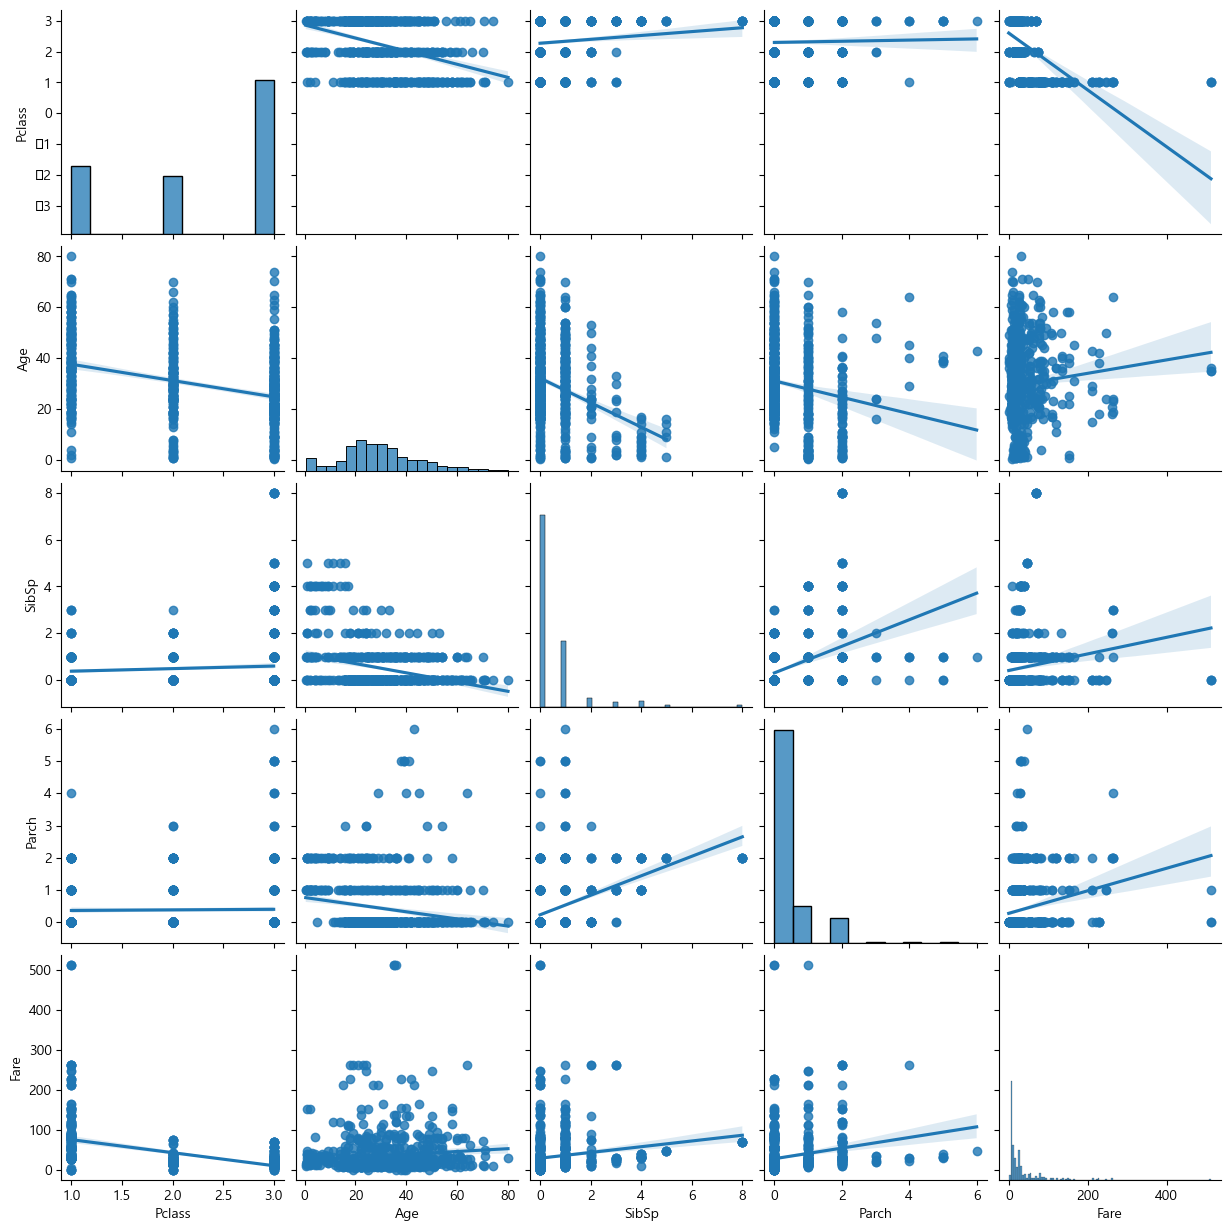

In [42]:
sns.pairplot(df[['Pclass','Age','SibSp','Parch','Fare']],diag_kind = 'hist',kind='reg')
#연속형, 서순형변수 간 상관관계 확인

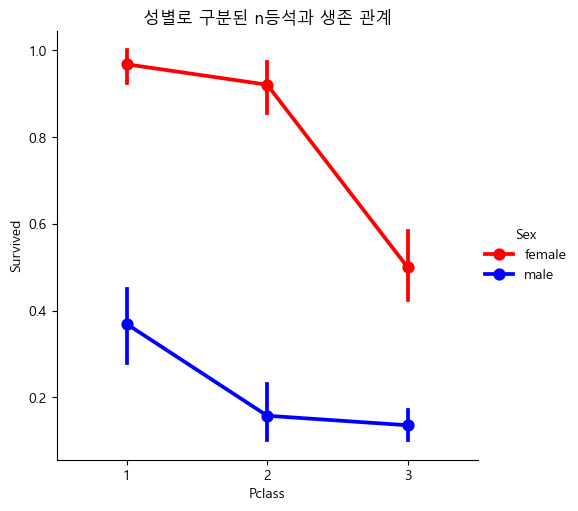

In [197]:
sns.catplot(x='Pclass',y = 'Survived', hue = 'Sex', data=df, kind = 'point',palette= {'male': 'blue', 'female': 'red'})
# ax매개변수 불가
plt.title("성별로 구분된 n등석과 생존 관계");

# Age - # 나이가 적을수록 생존자가 많다.

c:\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


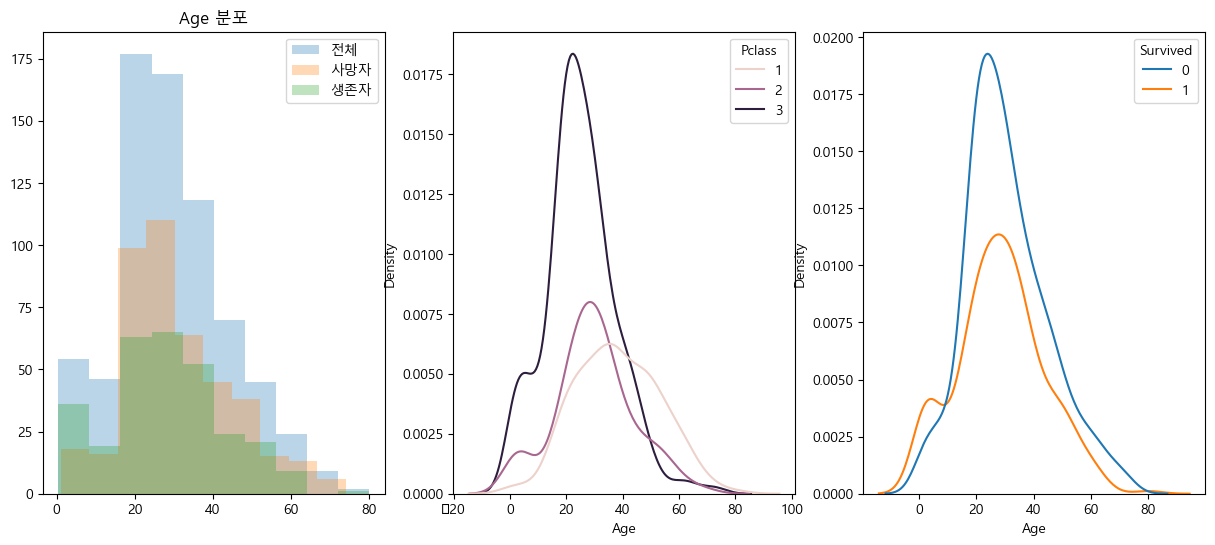

In [198]:
f,a =  plt.subplots(1,3,figsize = (15,6));
a[0].set_title('Age 분포');
a[0].hist(df['Age'],alpha = 0.3,label = '전체');
a[0].hist(df[df['Survived'] == 0]['Age'],alpha = 0.3,label = '사망자');
a[0].hist(df[df['Survived'] == 1]['Age'],alpha = 0.3,label = '생존자');
a[0].legend();

sns.kdeplot(df,x = 'Age',ax = a[1],hue = 'Pclass');
sns.kdeplot(df,x= 'Age',ax = a[2],hue = 'Survived');

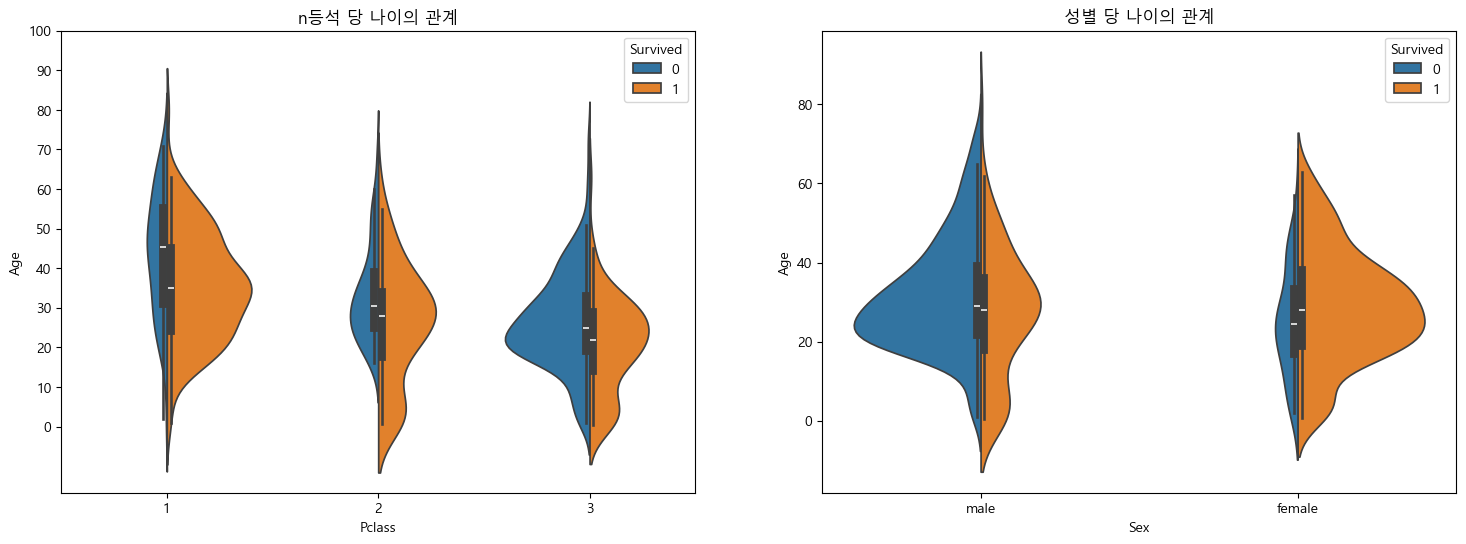

In [199]:
f,a = plt.subplots(1,2,figsize = (18,6))
sns.violinplot(df, x = 'Pclass', y = 'Age' ,hue = 'Survived',split= True ,ax = a[0],density_norm= 'count')
a[0].set_yticks(range(0,110,10))

sns.violinplot(df,x = 'Sex', y = 'Age' , ax = a[1], hue = 'Survived',split = True,density_norm= 'count')
a[0].set_yticks(range(0,110,10));
a[0].set_title("n등석 당 나이의 관계")
a[1].set_title("성별 당 나이의 관계");

# Embarked - C 탑승지가 제일 사망률이 높다.

C:\Users\yunji\AppData\Local\Temp\ipykernel_1092\1861586109.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[1].set_xticklabels(list('CQS'),rotation = 0)


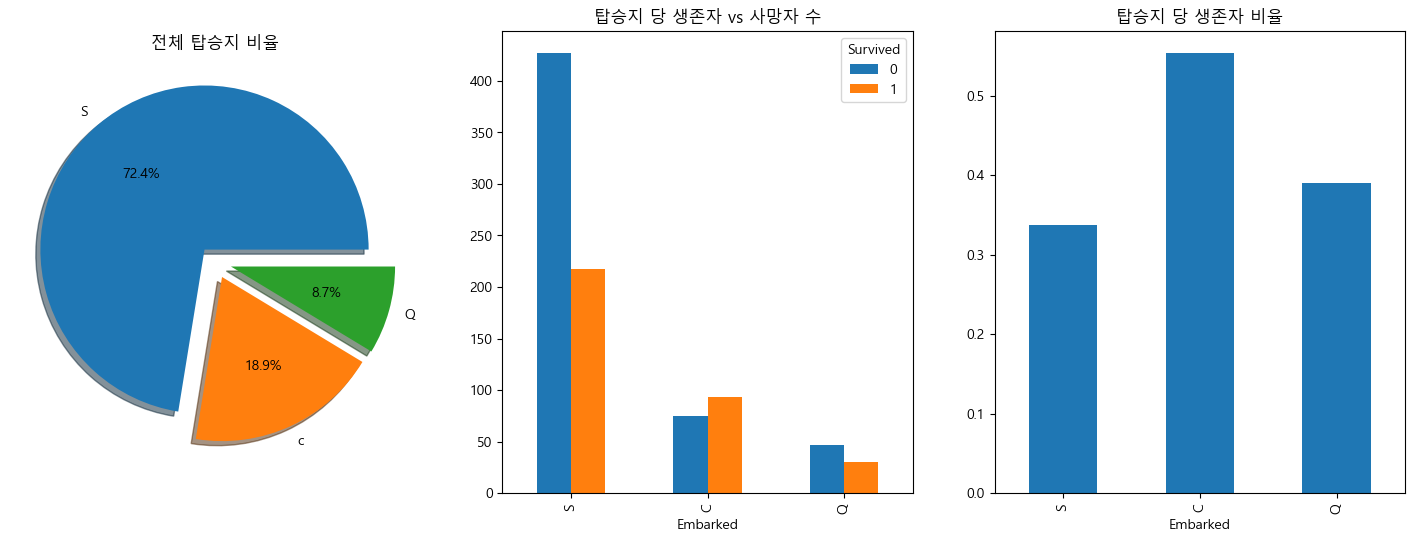

In [201]:
f,a = plt.subplots(1,3,figsize= (18,6))
e = df['Embarked'].value_counts()
a[0].pie(e,autopct ='%.1f%%',labels= ['S','c','Q'],explode = [0.1,0.1,0.1],shadow = True)
a[1].set_xticklabels(list('CQS'),rotation = 0)
df[['Embarked','Survived']].groupby(['Embarked','Survived'],).size().unstack().loc[['S','C','Q']].plot.bar(ax=  a[1])
(df[df['Survived'] == 1]['Embarked'].value_counts()/df['Embarked'].value_counts()).plot.bar(ax = a[2])

a[0].set_title('전체 탑승지 비율');
a[1].set_title('탑승지 당 생존자 vs 사망자 수');
a[2].set_title('탑승지 당 생존자 비율');

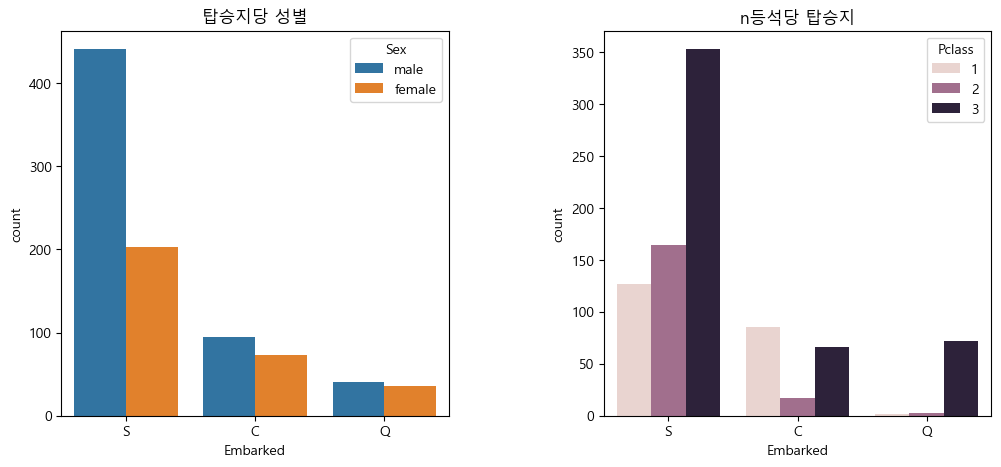

In [202]:
f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(data = df, x = 'Embarked', hue = 'Sex',ax = ax[0])
sns.countplot(data = df, x = 'Embarked', hue = 'Pclass',ax = ax[1])
ax[0].set_title('탑승지당 성별')
ax[1].set_title('n등석당 탑승지')
f.subplots_adjust(wspace= 0.4)

# FamillySize = SibSp + Parch - 다인가족 사망률 100%, 4,3,2명인 가족 최대 생존률

In [203]:
# 본인까지 더하기
df['FamillySize'] = df['SibSp'] + df['Parch'] + 1

In [204]:
df['FamillySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamillySize, dtype: float64

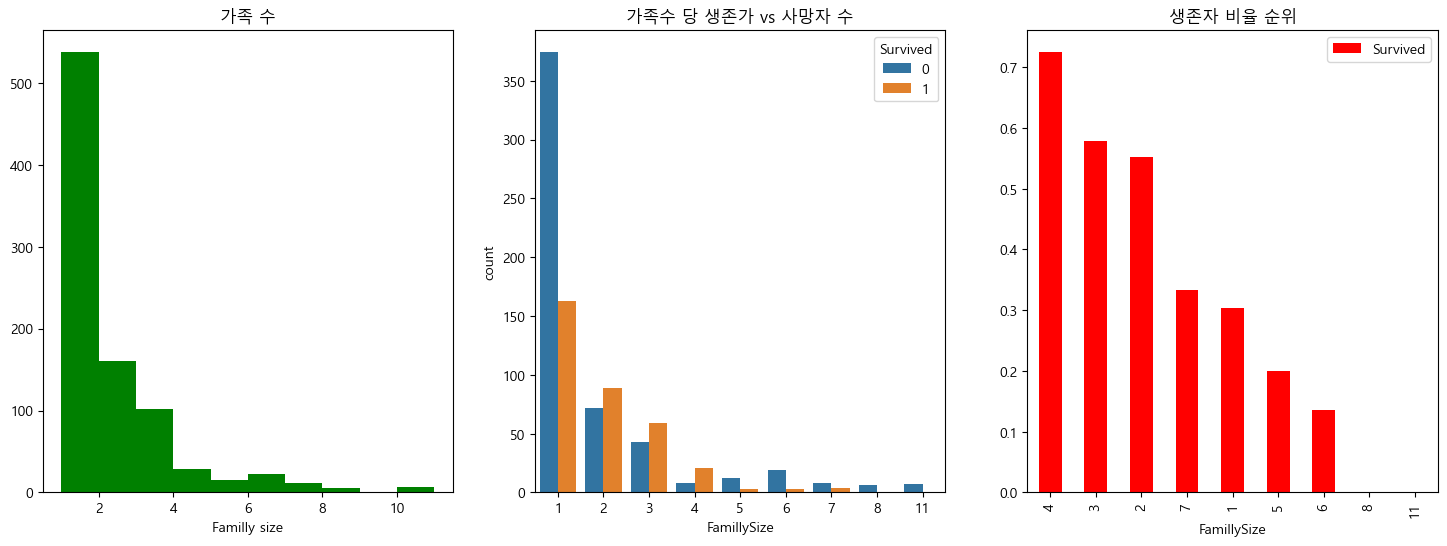

In [205]:
f,ax =  plt.subplots(1,3,figsize = (18,6))

ax[0].hist(df['FamillySize'],color = 'g');
ax[0].set_title('가족 수')
ax[0].set_xlabel('Familly size')

sns.countplot(data = df , x = 'FamillySize', hue = 'Survived', ax = ax[1])
df[['FamillySize','Survived']].groupby('FamillySize').mean().sort_values(ascending= False , by = 'Survived').plot.bar( color = 'red', ax = ax[2])
ax[1].set_title('가족수 당 생존가 vs 사망자 수');
ax[2].set_title('생존자 비율 순위');


# Fare, Cabin, Ticket

In [206]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

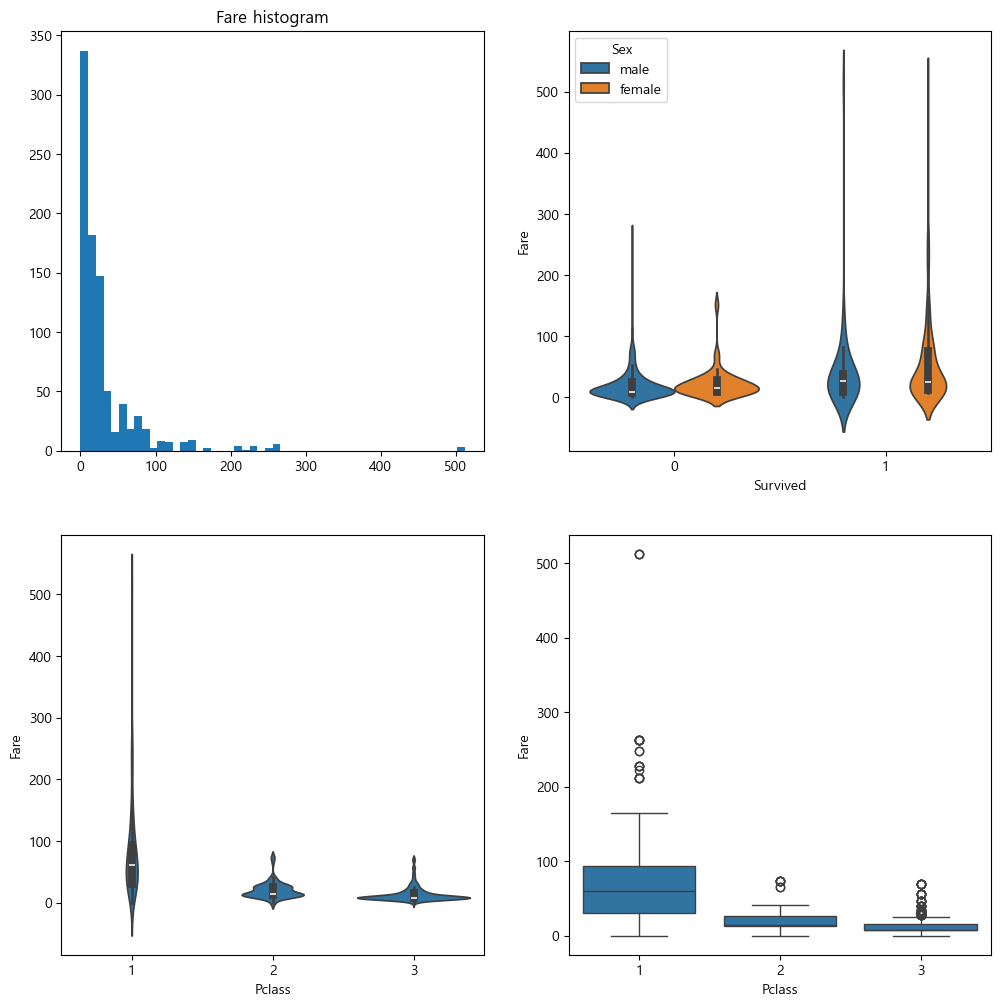

In [208]:
f,a = plt.subplots(2,2,figsize = (12,12))
a[0,0].hist(df['Fare'],bins = 50 );
a[0,0].set_title('Fare histogram')

sns.violinplot(data = df, x = 'Survived', y = 'Fare' ,hue = 'Sex', ax = a[0,1] )
sns.violinplot(data = df, x = 'Pclass', y = 'Fare' , ax = a[1,0] )
sns.boxplot(data = df, y = 'Fare',x = 'Pclass')

In [209]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [210]:
df['Cabin'] = df['Cabin'].str[:1]
df_test['Cabin'] = df_test['Cabin'].str[:1]

In [211]:
df.loc[df['Cabin'].isnull(),'Cabin'] = 'N'
df_test.loc[df_test['Cabin'].isnull(),'Cabin'] = 'N'

# Cabin에서 결측치는 많지만, 결측치에 속하면 생존률이 낮음

In [213]:
df['Cabin'].value_counts().index

Index(['N', 'C', 'B', 'D', 'E', 'A', 'F', 'G', 'T'], dtype='object', name='Cabin')

<Axes: xlabel='Cabin'>

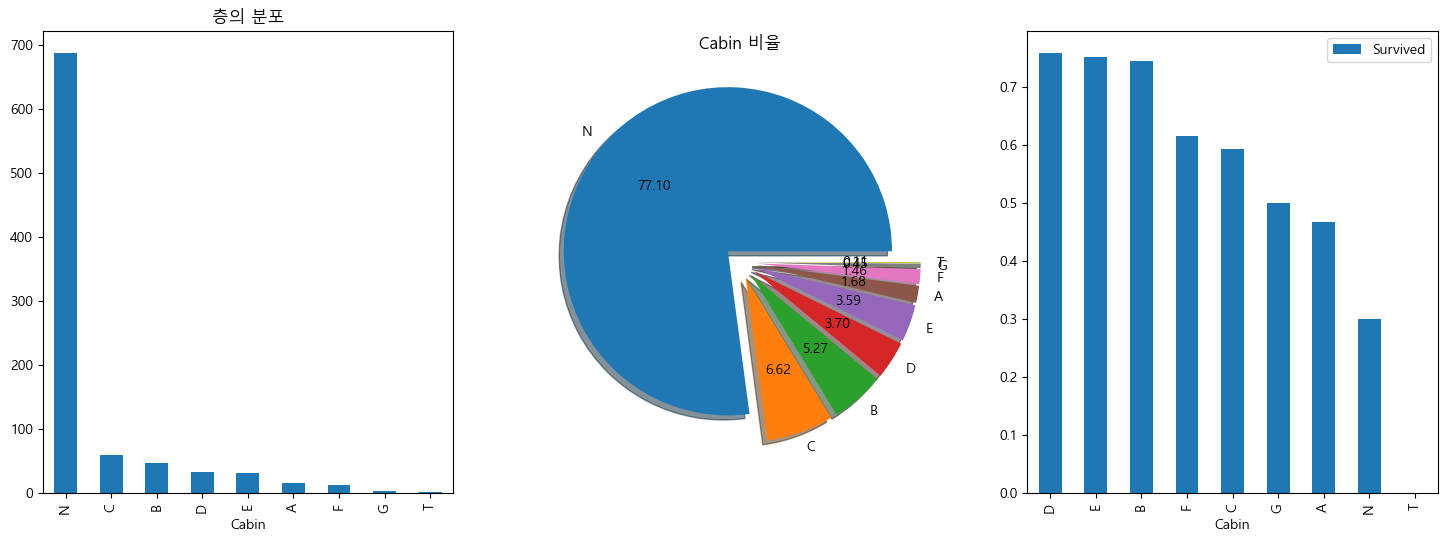

In [214]:
f,a = plt.subplots(1,3,figsize = (18,6))
df['Cabin'].value_counts().plot.bar( ax = a[0])
a[0].set_title('층의 분포')

a[1].pie(df['Cabin'].value_counts(),labels = ['N', 'C', 'B', 'D', 'E', 'A', 'F', 'G', 'T'], autopct = '%.2f', explode = [0.1]*9, shadow = True)

a[1].set_title('Cabin 비율')
df[['Cabin','Survived']].groupby('Cabin').mean().sort_values('Survived',ascending= False).plot.bar(ax = a[2])


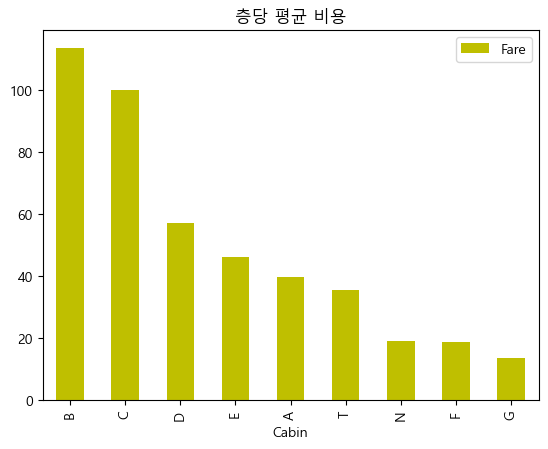

In [215]:
df[['Fare', 'Cabin']].groupby('Cabin').mean().sort_values('Fare',ascending= False).plot.bar(color = 'y')
plt.title('층당 평균 비용');

# Feature engineering

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamillySize  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


# test set 변경

In [218]:
df['Sex'] = df['Sex'].map({'male': 0 , 'female' : 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

In [219]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

<Axes: >

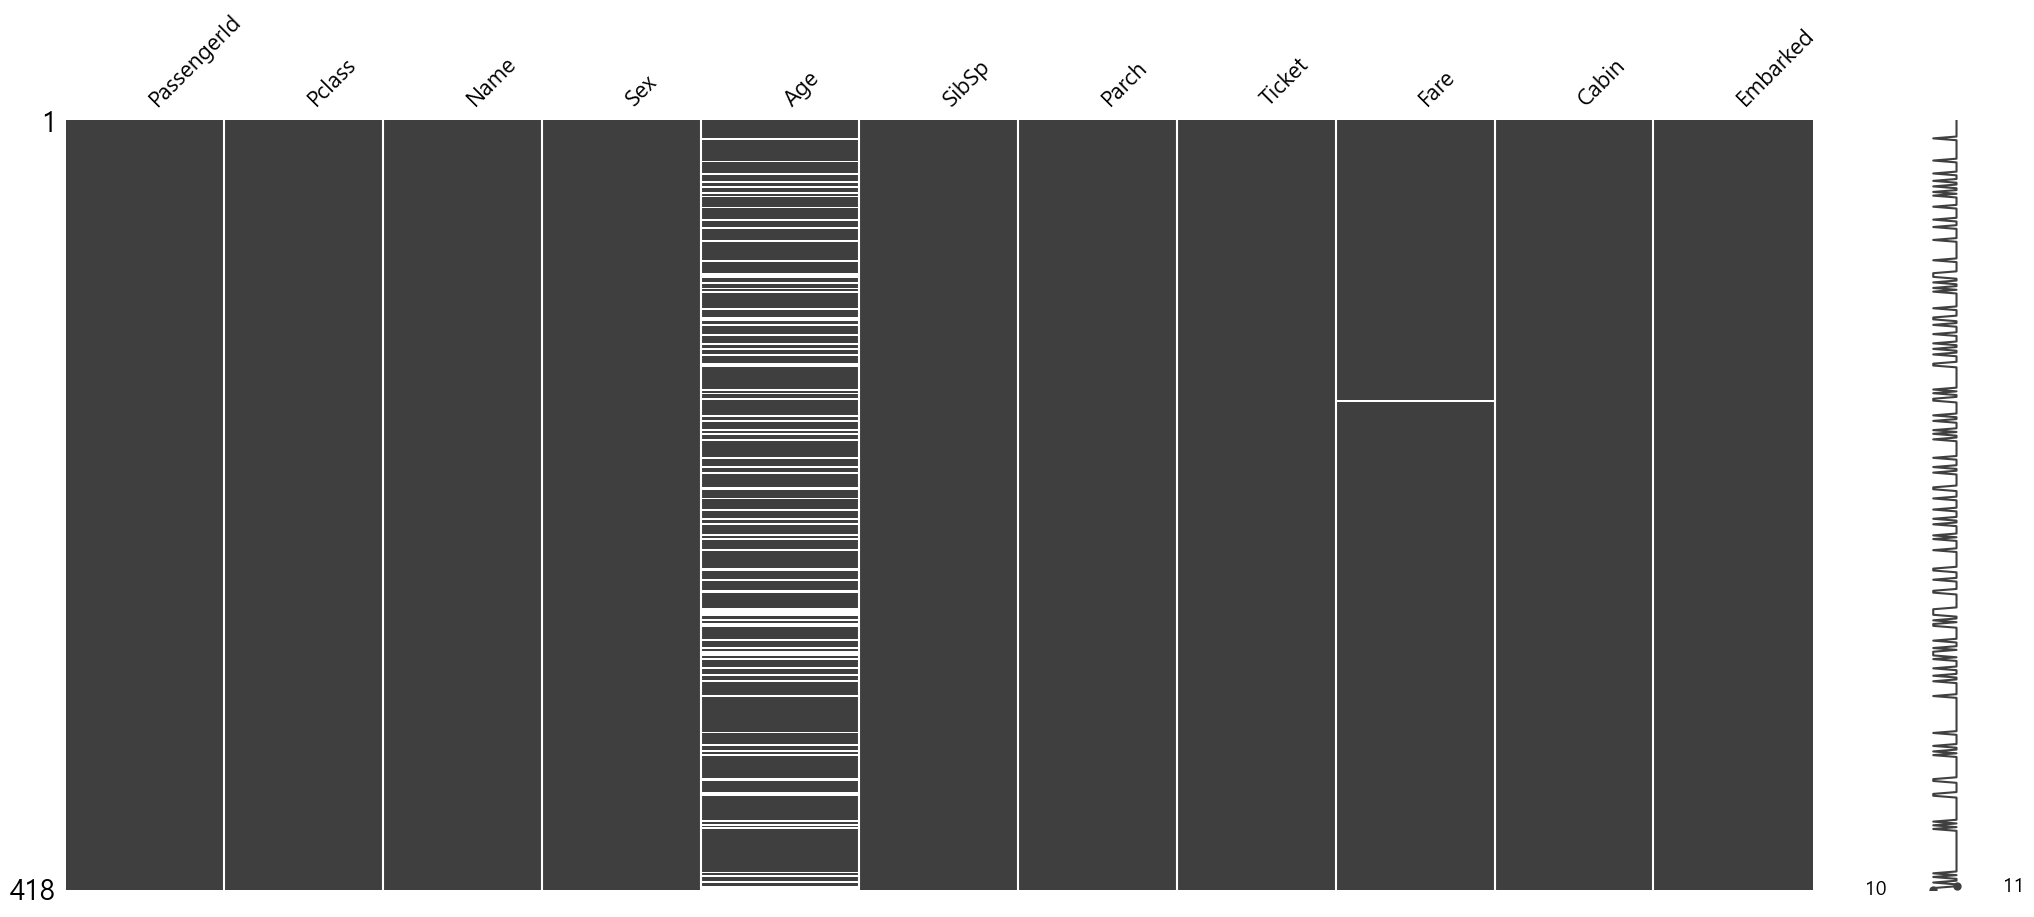

In [220]:
msno.matrix(df_test)

# Fare 결측치 --> pclass를 통한 평균치 이용

In [221]:
df_test[df_test['Fare'].isnull()] # 3등석의 사람

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,N,S


In [225]:
df[['Pclass','Fare']].groupby('Pclass').mean()

# 데이터 누수 방지를 위해 trian 데이터의 정보 이용

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
# 12로 대치
df_test.loc[df_test['Fare'].isnull(),'Fare'] = 13.6

In [226]:
df['Initial'] = df['Name'].str.extract(r'(\w+)[.]')
df_test['Initial'] = df_test['Name'].str.extract(r'(\w+)[.]')

# Age 결측치 --> 나이의 직위를 통한 평균치로 대치

In [229]:
df_test['FamillySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [230]:
df.drop(['PassengerId', 'SibSp', 'Parch', 'Name'], axis=1, inplace=True)

In [231]:
df_test.drop(['PassengerId', 'SibSp', 'Parch','Name'], axis=1, inplace=True)

In [234]:
# 컬럼일치 확인
s1 = set(df_test.columns)
s2 = set(df.columns)
s1 ^ s2 # 대칭 차집합

{'Survived'}

# Age는 약 20%가 결측치 -> 이름을 통해 평균대치

In [235]:
pd.set_option('display.max_rows', None)
df['Initial'].value_counts()

Initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [236]:
pd.crosstab(df['Initial'],df['Sex'])

Sex,0,1
Initial,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [237]:
ts = df_test['Initial'].unique()
ts = set(ts)
tas = df['Initial'].unique()
tas = set(tas)

In [238]:
# Dona 빠뜨리지 말기
ts - tas

{'Dona'}

In [239]:
d = {
    'Capt' : 'Mr',
    'Col': 'Mr',
    'Countess': 'Mrs',
    "Don": "Mr",
    "Dr": "Other",
    "Major": "Mr",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Rev": "Mr",
    'Sir': "Mr",
    'Ms' : "Miss",
    "Jonkheer": "Mr",
    "Lady":"Mrs",
    "Dona": "Mrs"
        }
df['Initial'] = df['Initial'].replace(d)
df_test['Initial'] = df_test['Initial'].replace(d)

In [240]:
df['Initial'].value_counts()

Initial
Mr        531
Miss      185
Mrs       128
Master     40
Other       7
Name: count, dtype: int64

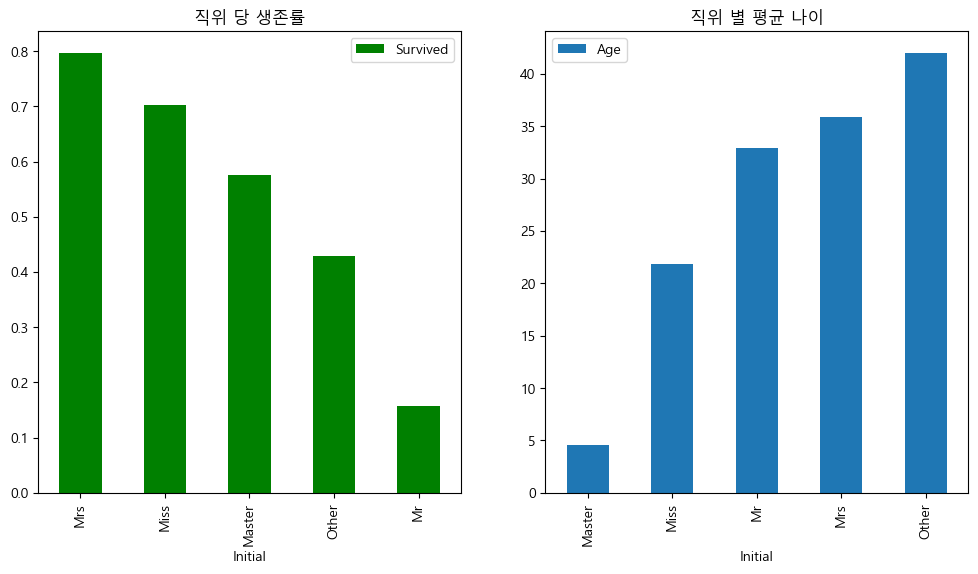

In [241]:
f,a = plt.subplots(1,2,figsize = (12,6))
df[['Survived','Initial']].groupby('Initial').mean().sort_values(by = 'Survived',ascending=False).plot.bar(ax = a[0],color = 'green')
df[['Age','Initial']].groupby('Initial').mean().plot.bar(ax = a[1])
a[0].set_title('직위 당 생존률')
a[1].set_title('직위 별 평균 나이');

In [248]:
Aged = df[['Age','Initial']].groupby('Initial').mean()
Aged

,Age
Initial,
Master,4.574167
Miss,21.845638
Mr,32.89199
Mrs,35.873874
Other,42.0


In [251]:
d_aged = Aged.to_dict()['Age']

In [84]:
df.loc[df['Age'].isnull()].head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamillySize,Initial
5,0,3,0,NaN,330877,8.4583,N,Q,1,Mr
17,1,2,0,NaN,244373,13.0000,N,S,1,Mr
19,1,3,1,NaN,2649,7.2250,N,C,1,Mrs
26,0,3,0,NaN,2631,7.2250,N,C,1,Mr
28,1,3,1,NaN,330959,7.8792,N,Q,1,Miss


In [256]:
df.loc[df['Age'].isnull(),'Age'] = df.loc[df['Age'].isnull()]['Initial'].map(d_aged)

In [258]:
df_test.loc[df_test['Age'].isnull(),'Age'] = df_test.loc[df_test['Age'].isnull(),'Initial'].map(d_aged)

In [259]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       2
FamillySize    0
Initial        0
dtype: int64

# Embarked 최빈값 대치

In [260]:
df.loc[df['Embarked'].isnull(),'Embarked'] = df['Embarked'].mode()[0]

In [261]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamillySize    0
Initial        0
dtype: int64

In [262]:
del df['Ticket']
del df_test['Ticket']

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    object 
 4   Fare         891 non-null    float64
 5   Cabin        891 non-null    object 
 6   Embarked     891 non-null    object 
 7   FamillySize  891 non-null    int64  
 8   Initial      891 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 62.8+ KB


In [ ]:
# 인코딩 전 데이터 저장
df2 = df.copy()
df_test2  = df_test.copy()

# 범주형 변수(Initial , Embarked) -> 명목변수 인코딩

In [265]:
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [266]:
df_test['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

c:\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


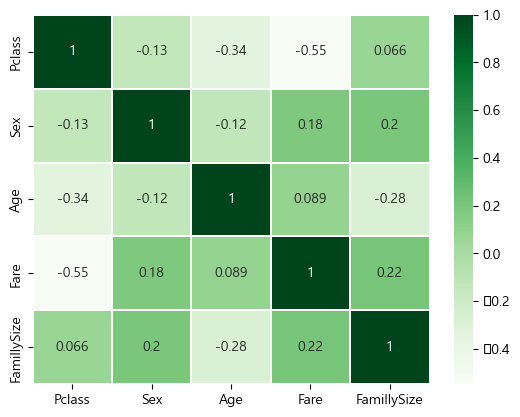

In [268]:
hmdata = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamillySize']]
sns.heatmap(hmdata.astype(np.float64).corr(),linewidths= 0.1
            ,annot=True,cmap= 'Greens');

In [269]:
dfem_train = pd.get_dummies(df['Embarked'],prefix= "Embarked" , dtype = int)
dfem_test = pd.get_dummies(df_test['Embarked'],prefix= "Embarked" , dtype = int)
df = pd.concat([df,dfem_train], axis= 1)
df_test = pd.concat([df_test,dfem_test], axis= 1)

In [270]:
dfem_train = pd.get_dummies(df['Initial'],prefix= "Initial" , dtype = int)
dfem_test = pd.get_dummies(df_test['Initial'],prefix= "Initial" , dtype = int)
df = pd.concat([df,dfem_train], axis= 1)
df_test = pd.concat([df_test,dfem_test], axis= 1)

In [271]:
dfca_train = pd.get_dummies(df['Cabin'],prefix= "Cabin" , dtype = int)
dfca_test = pd.get_dummies(df_test['Cabin'],prefix= "Cabin" , dtype = int)
df = pd.concat([df,dfca_train], axis= 1)
df_test = pd.concat([df_test,dfca_test], axis= 1)

In [272]:
df.drop(['Initial','Embarked','Cabin'],axis = 1,inplace = True)
df_test.drop(['Initial','Embarked','Cabin'], axis = 1,inplace = True)

In [273]:
print(df.shape)
print(df_test.shape)

(891, 23)
(418, 21)


In [274]:
s_df = set(df.columns)
s_test = set(df_test.columns)
print(s_df ^ s_test)

{'Cabin_T', 'Survived'}


# test, train 의 피처 개수 맞춤

In [275]:
df_test['Cabin_T'] = 0

In [277]:
print(df.shape)
print(df_test.shape)

(891, 23)
(418, 22)


In [298]:
df['Age'] = df['Age'].astype(float)

In [302]:
df.to_csv('./dataset/train_preprocessed.csv',index = False)
df_test.to_csv('./dataset/test_preprocessed.csv',index = False)